In [1]:
from scipy.stats import entropy
import numpy as np
import torch
from torch.autograd import Variable
from torch import nn


In [117]:
def gen_data():
    def f():
        x = np.random.randint(2)
        if x == 0:
            if np.random.rand() > 0.5:
                return 0, 0
            else:
                return 0,1
        else:
            if np.random.rand() > 0.5:
                return 1, 0
            else:
                return 1,1
    x,y = f()
    x = torch.from_numpy(np.array(np.float32([x])))
    y = torch.from_numpy(np.array(np.float32([y])))
                    
    return Variable(x),Variable(y)


In [88]:
gen_data()

(Variable containing:
  1
 [torch.FloatTensor of size 1], Variable containing:
  1
 [torch.FloatTensor of size 1])

In [89]:
#loss = nn.CrossEntropyLoss()
sig = nn.Sigmoid()
W1 = Variable(torch.rand(1), requires_grad=True)
b1 = Variable(torch.rand(1), requires_grad=True)
W2 = Variable(torch.rand(1), requires_grad=True)
b2 = Variable(torch.rand(1), requires_grad=True)

In [179]:
np.linspace(0.01, 0.99)

array([ 0.01,  0.03,  0.05,  0.07,  0.09,  0.11,  0.13,  0.15,  0.17,
        0.19,  0.21,  0.23,  0.25,  0.27,  0.29,  0.31,  0.33,  0.35,
        0.37,  0.39,  0.41,  0.43,  0.45,  0.47,  0.49,  0.51,  0.53,
        0.55,  0.57,  0.59,  0.61,  0.63,  0.65,  0.67,  0.69,  0.71,
        0.73,  0.75,  0.77,  0.79,  0.81,  0.83,  0.85,  0.87,  0.89,
        0.91,  0.93,  0.95,  0.97,  0.99])

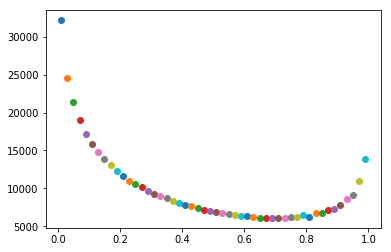

In [182]:
#y = 0.5
import matplotlib.pyplot as plt
for y_ in np.linspace(0.01, 0.99):
    s = 0
    for _ in range(10000):
        y = int(np.random.rand() + 0.7)
        s += -(y*np.log(y_) + (1-y)*np.log(1-y_)) 
    plt.plot(y_,s,'o')
plt.show()

In [106]:
def net(x,y):
    y_ = W1*x + b1
    y_ = sig(y_)
    loss = -(y*torch.log(y_) + (1-y)*torch.log(1-y_))
    #loss_fn = nn.MSELoss()
    #loss = loss_fn(y_,y)
    return y_, loss

In [140]:
learning_rate = 1
L = []
for t in range(1,50000):
#     batch_loss = Variable(torch.zeros(1), requires_grad=True)
#     for _ in range(1000):
#         x,y = gen_data()
#         y_, loss = net(x,y)
#         batch_loss = batch_loss + loss 
#     print(batch_loss.data.numpy())
#     batch_loss.backward()
    x,y = gen_data()
    y_, loss = net(x,y)
    loss.backward()
    W1.data -= learning_rate * W1.grad.data
    b1.data -= learning_rate * b1.grad.data
    W1.grad.data.zero_()
    b1.grad.data.zero_()

In [146]:
x,y = gen_data()
y_, loss = net(x,y)
print(x,y,y_) 

Variable containing:
 0
[torch.FloatTensor of size 1]
 Variable containing:
 1
[torch.FloatTensor of size 1]
 Variable containing:
 0.8621
[torch.FloatTensor of size 1]

